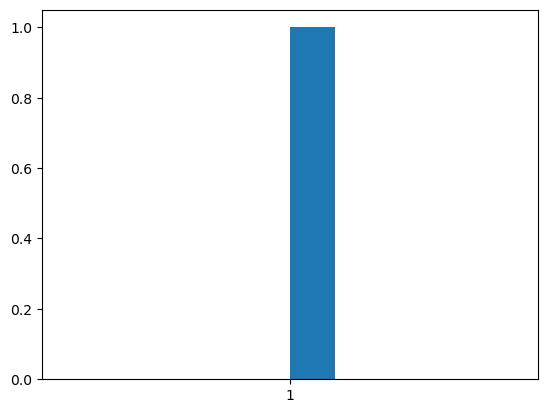

In [68]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# initialise local simulator and quantum/ classical registers
simulator = AerSimulator()

# Part 2: Shor code with error correction
q = QuantumRegister(9, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q, c)

#set initial qubit to 1 for example
circuit.x(q[0])

# encode qubit for both phase flip and bit-flip errors (concatenation)
circuit.cx(q[0], q[3])
circuit.cx(q[0], q[6])
circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])
circuit.cx(q[0], q[1])
circuit.cx(q[3], q[4])
circuit.cx(q[6], q[7])
circuit.cx(q[0], q[2])
circuit.cx(q[3], q[5])
circuit.cx(q[6], q[8])
circuit.barrier()

# introduce errors
circuit.x(q[0])  # bit flip error
circuit.z(q[0])  # phase flip error
circuit.barrier()

# perform error correction
circuit.cx(q[0], q[1])
circuit.cx(q[3], q[4])
circuit.cx(q[6], q[7])
circuit.cx(q[0], q[2])
circuit.cx(q[3], q[5])
circuit.cx(q[6], q[8])
circuit.ccx(q[1], q[2], q[0])
circuit.ccx(q[4], q[5], q[3])
circuit.ccx(q[8], q[7], q[6])
circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])
circuit.cx(q[0], q[3])
circuit.cx(q[0], q[6])
circuit.ccx(q[6], q[3], q[0])
circuit.barrier()

# measure logical qubit
circuit.measure(q[0], c[0])

# Simulate
job = simulator.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts()

circuit.draw(output='mpl', filename='shorcode.png')
circuit.draw()
counts

plt.hist(counts)

# Save histogram to file
plt.savefig('histogram.png')